In [1]:
from IPython.core.display import HTML
HTML('<style> .container{ width:90%; } </style>')

In [2]:
'''import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install regex
!{sys.executable} -m pip install contractions
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install keras_metrics
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install tables
!{sys.executable} -m pip install h5py'''

'import sys\n!{sys.executable} -m pip install numpy\n!{sys.executable} -m pip install pandas\n!{sys.executable} -m pip install regex\n!{sys.executable} -m pip install contractions\n!{sys.executable} -m pip install nltk\n!{sys.executable} -m pip install matplotlib\n!{sys.executable} -m pip install seaborn\n!{sys.executable} -m pip install sklearn\n!{sys.executable} -m pip install xgboost\n!{sys.executable} -m pip install lightgbm\n!{sys.executable} -m pip install tensorflow\n!{sys.executable} -m pip install keras\n!{sys.executable} -m pip install keras_metrics\n!{sys.executable} -m pip install tqdm\n!{sys.executable} -m pip install tables\n!{sys.executable} -m pip install h5py'

In [3]:
import regex
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.autonotebook import tqdm

%matplotlib inline

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
train = pd.read_csv('data/imdb_reviews_train.txt', sep="\t")
train.text = train.text.str.strip()
train.text = train.text.str.lower()

In [5]:
train.head(10)

,text,review
0,story of a man who has unnatural feelings for ...,neg
1,airport '77 starts as a brand new luxury 747 p...,neg
2,this film lacked something i couldn't put my f...,neg
3,"sorry everyone,,, i know this is supposed to b...",neg
4,when i was little my parents took me along to ...,neg
5,it appears that many critics find the idea of ...,neg
6,the second attempt by a new york intellectual ...,neg
7,"i don't know who to blame, the timid writers o...",neg
8,this film is mediocre at best. angie harmon is...,neg
9,the film is bad. there is no other way to say ...,neg


In [6]:
train.iloc[9]['text']

'the film is bad. there is no other way to say it. the story is weak and outdated, especially for this country. i don\'t think most people know what a "walker" is or will really care. i felt as if i was watching a movie from the 70\'s. the subject was just not believable for the year 2007, even being set in dc. i think this rang true for everyone else who watched it too as the applause were low and quick at the end. most didn\'t stay for the q&a either.<br /><br />i don\'t think schrader really thought the film out ahead of time. many of the scenes seemed to be cut short as if they were never finished or he just didn\'t know how to finish them. he jumped from one scene to the next and you had to try and figure out or guess what was going on. i really didn\'t get woody\'s (carter) private life or boyfriend either. what were all the "artistic" male bondage and torture pictures (from iraq prisons) about? what was he thinking? i think it was his very poor attempt at trying to create this d

Replace contractions, e.g. "didn't" ==> "did not"

In [7]:
tqdm.pandas(desc="Fixing contractions", ncols=1000)
import contractions_fixer
train.text = train.text.progress_apply(lambda x: contractions_fixer.fix(x))
train.iloc[9].text

'the film is bad. there is no other way to say it. the story is weak and outdated, especially for this country. i do not think most people know what a "walker" is or will really care. i felt as if i was watching a movie from the 70\'s. the subject was just not believable for the year 2007, even being set in dc. i think this rang true for everyone else who watched it too as the applause were low and quick at the end. most did not stay for the q&a either.<br /><br />i do not think schrader really thought the film out ahead of time. many of the scenes seemed to be cut short as if they were never finished or he just did not know how to finish them. he jumped from one scene to the next and you had to try and figure out or guess what was going on. i really did not get woody\'s (carter) private life or boyfriend either. what were all the "artistic" male bondage and torture pictures (from iraq prisons) about? what was he thinking? i think it was his very poor attempt at trying to create this d

Replace hyphens, forward slashes and HTML line breaks with spaces; replace ampersands with " and "

In [8]:
tqdm.pandas(desc="Removing line breaks", ncols=1000)
pattern = regex.compile("(<br\s*/>)|(\-)|(\/)")
train.text = train.text.progress_apply(lambda x: pattern.sub(" ", x))

tqdm.pandas(desc="Removing ampersands", ncols=1000)
pattern = regex.compile("&")
train.text = train.text.progress_apply(lambda x: pattern.sub(" and ", x))
train.iloc[9].text

'the film is bad. there is no other way to say it. the story is weak and outdated, especially for this country. i do not think most people know what a "walker" is or will really care. i felt as if i was watching a movie from the 70\'s. the subject was just not believable for the year 2007, even being set in dc. i think this rang true for everyone else who watched it too as the applause were low and quick at the end. most did not stay for the q and a either.  i do not think schrader really thought the film out ahead of time. many of the scenes seemed to be cut short as if they were never finished or he just did not know how to finish them. he jumped from one scene to the next and you had to try and figure out or guess what was going on. i really did not get woody\'s (carter) private life or boyfriend either. what were all the "artistic" male bondage and torture pictures (from iraq prisons) about? what was he thinking? i think it was his very poor attempt at trying to create this dark pr

Remove punctuation symbols

In [9]:
import string
tqdm.pandas(desc="Removing punctuation", ncols=1000)
pattern = regex.compile('[{}]'.format(regex.escape(string.punctuation)))
train.text = train.text.progress_apply(lambda x: pattern.sub("", x))
train.iloc[9].text

'the film is bad there is no other way to say it the story is weak and outdated especially for this country i do not think most people know what a walker is or will really care i felt as if i was watching a movie from the 70s the subject was just not believable for the year 2007 even being set in dc i think this rang true for everyone else who watched it too as the applause were low and quick at the end most did not stay for the q and a either  i do not think schrader really thought the film out ahead of time many of the scenes seemed to be cut short as if they were never finished or he just did not know how to finish them he jumped from one scene to the next and you had to try and figure out or guess what was going on i really did not get woodys carter private life or boyfriend either what were all the artistic male bondage and torture pictures from iraq prisons about what was he thinking i think it was his very poor attempt at trying to create this dark private subculture life for wo

Regex to remove every instance of a full stop word from the text

In [10]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tqdm.pandas(desc="Removing stop words", ncols=1000)
pattern = regex.compile("\\b(" + "|".join(stop_words) + ")\\b")
train.text = train.text.progress_apply(lambda x: pattern.sub("", x))
train.iloc[9].text

[nltk_data] Downloading package stopwords to C:\Users\Jorge de
[nltk_data]     Bustos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


' film  bad     way  say   story  weak  outdated especially   country    think  people know   walker    really care  felt     watching  movie   70s  subject    believable   year 2007 even  set  dc  think  rang true  everyone else  watched     applause  low  quick   end    stay   q   either     think schrader really thought  film  ahead  time many   scenes seemed   cut short     never finished      know   finish   jumped  one scene   next     try  figure   guess   going   really   get woodys carter private life  boyfriend either     artistic male bondage  torture pictures  iraq prisons     thinking  think     poor attempt  trying  create  dark private subculture life  woodys character car    work    even seem  make sense really    good thing   film  woody harrelson  played  character car flawlessly  really  get  great sense    walker may   like say twenty years ago   great   likely  never get recognized       lauren lily  kristin boring    see    painful unless    true harrelson fan'

In [11]:
train.to_hdf("data/train.hdf5", "train")

In [12]:
train = pd.read_hdf("data/train.hdf5", "train")

In [13]:
metrics_df = pd.DataFrame(columns=['vectorizer', 'classifier', 'accuracy', 'precision', 'recall', 'f1', 'specificity'])
metrics_df = metrics_df.set_index(['vectorizer', 'classifier'])

In [14]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, auc, \
    roc_auc_score, roc_curve, precision_recall_curve, recall_score, average_precision_score, precision_score
from sklearn.externals import joblib
from sklearn.exceptions import DataConversionWarning
from lightgbm.sklearn import LGBMClassifier

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [15]:
def plot_metrics(classifier, classifier_name, vectorizer_name, X_train, X_val, y_train, y_val):
    prediction = classifier.predict(X_val.astype('float32'))
    accuracy = accuracy_score(y_val, prediction)
    f1 = f1_score(y_val, prediction, pos_label="pos")
    recall = recall_score(y_val, prediction, pos_label="pos")
    precision = precision_score(y_val, prediction, pos_label="pos")
    specificity = recall_score(y_val, prediction, pos_label="neg")
    print('Vectorizer: %s. Classifier: %s' % \
          (vectorizer_name, classifier_name))
    print('Accuracy: %0.3f. Precision: %0.3f. Recall: %0.3f. F1 Score: %0.3f. Specificity: %0.3f' % \
          (accuracy, precision, recall, f1, specificity))
    print(classification_report(y_val, prediction))
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_val, prediction), annot=True, fmt="d")
    metrics_df.loc[(vectorizer_name, classifier_name), :] = [
        accuracy,
        precision,
        recall,
        f1,
        specificity,
    ]
    plt.show()

In [16]:
def classify_and_plot(classifier, classifier_name, vectorizer_name, X_train, X_val, y_train, y_val):
    classifier.fit(X_train.astype('float32'), y_train)
    plot_metrics(classifier, classifier_name, vectorizer_name, X_train, X_val, y_train, y_val)
    return classifier

In [17]:
def make_vectorizers():
    vectorizers = [
        ("CountVectorizer_Bin", CountVectorizer(binary=True)),
        ("CountVectorizer_NonBin", CountVectorizer(binary=False)),
        ("TfidfVectorizer", TfidfVectorizer()),
    ]
    return vectorizers

In [18]:
def make_classifiers():
    classifiers = [
        ("LogisticRegression", LogisticRegression(solver='liblinear', C=0.5)),
        ("MultinomialNB", MultinomialNB()),
        ("RandomForestClassifier", RandomForestClassifier(n_estimators=100)),
        #("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100)),
        #("AdaBoostClassifier", AdaBoostClassifier(n_estimators=100)),
        ("LGBMClassifier", LGBMClassifier()),
        ("LinearSVC", LinearSVC(C=0.2)),
    ]
    return classifiers

Vectorizer: CountVectorizer_Bin. Classifier: LogisticRegression
Accuracy: 0.874. Precision: 0.866. Recall: 0.882. F1 Score: 0.874. Specificity: 0.866
              precision    recall  f1-score   support

         neg       0.88      0.87      0.87      2515
         pos       0.87      0.88      0.87      2485

   micro avg       0.87      0.87      0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



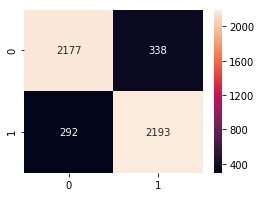

Vectorizer: CountVectorizer_Bin. Classifier: MultinomialNB
Accuracy: 0.858. Precision: 0.872. Recall: 0.837. F1 Score: 0.854. Specificity: 0.879
              precision    recall  f1-score   support

         neg       0.85      0.88      0.86      2515
         pos       0.87      0.84      0.85      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



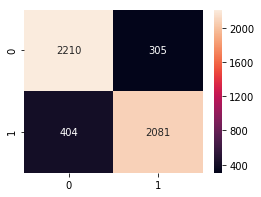

Vectorizer: CountVectorizer_Bin. Classifier: RandomForestClassifier
Accuracy: 0.856. Precision: 0.859. Recall: 0.850. F1 Score: 0.854. Specificity: 0.862
              precision    recall  f1-score   support

         neg       0.85      0.86      0.86      2515
         pos       0.86      0.85      0.85      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



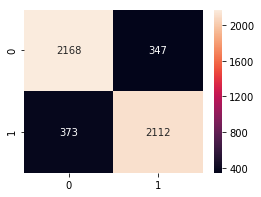

Vectorizer: CountVectorizer_Bin. Classifier: LGBMClassifier
Accuracy: 0.856. Precision: 0.845. Recall: 0.870. F1 Score: 0.857. Specificity: 0.843
              precision    recall  f1-score   support

         neg       0.87      0.84      0.85      2515
         pos       0.85      0.87      0.86      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



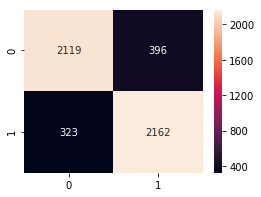

Vectorizer: CountVectorizer_Bin. Classifier: LinearSVC
Accuracy: 0.856. Precision: 0.852. Recall: 0.860. F1 Score: 0.856. Specificity: 0.852
              precision    recall  f1-score   support

         neg       0.86      0.85      0.86      2515
         pos       0.85      0.86      0.86      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



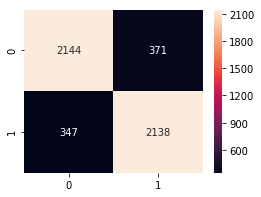

Vectorizer: CountVectorizer_NonBin. Classifier: LogisticRegression
Accuracy: 0.877. Precision: 0.871. Recall: 0.882. F1 Score: 0.877. Specificity: 0.871
              precision    recall  f1-score   support

         neg       0.88      0.87      0.88      2515
         pos       0.87      0.88      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



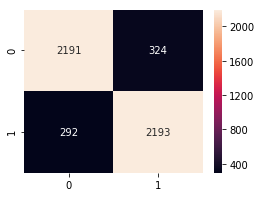

Vectorizer: CountVectorizer_NonBin. Classifier: MultinomialNB
Accuracy: 0.855. Precision: 0.868. Recall: 0.835. F1 Score: 0.852. Specificity: 0.875
              precision    recall  f1-score   support

         neg       0.84      0.87      0.86      2515
         pos       0.87      0.84      0.85      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



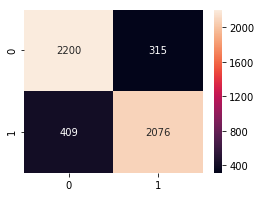

Vectorizer: CountVectorizer_NonBin. Classifier: RandomForestClassifier
Accuracy: 0.850. Precision: 0.850. Recall: 0.849. F1 Score: 0.849. Specificity: 0.852
              precision    recall  f1-score   support

         neg       0.85      0.85      0.85      2515
         pos       0.85      0.85      0.85      2485

   micro avg       0.85      0.85      0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



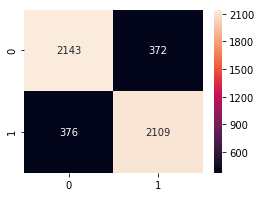

Vectorizer: CountVectorizer_NonBin. Classifier: LGBMClassifier
Accuracy: 0.863. Precision: 0.852. Recall: 0.877. F1 Score: 0.864. Specificity: 0.849
              precision    recall  f1-score   support

         neg       0.88      0.85      0.86      2515
         pos       0.85      0.88      0.86      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



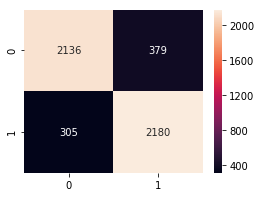

Vectorizer: CountVectorizer_NonBin. Classifier: LinearSVC
Accuracy: 0.863. Precision: 0.861. Recall: 0.864. F1 Score: 0.862. Specificity: 0.862
              precision    recall  f1-score   support

         neg       0.86      0.86      0.86      2515
         pos       0.86      0.86      0.86      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



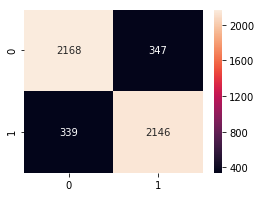

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression
Accuracy: 0.881. Precision: 0.867. Recall: 0.897. F1 Score: 0.882. Specificity: 0.864
              precision    recall  f1-score   support

         neg       0.89      0.86      0.88      2515
         pos       0.87      0.90      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



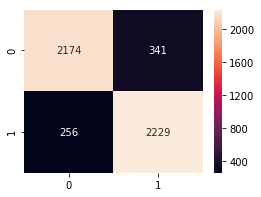

Vectorizer: TfidfVectorizer. Classifier: MultinomialNB
Accuracy: 0.860. Precision: 0.867. Recall: 0.849. F1 Score: 0.858. Specificity: 0.871
              precision    recall  f1-score   support

         neg       0.85      0.87      0.86      2515
         pos       0.87      0.85      0.86      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



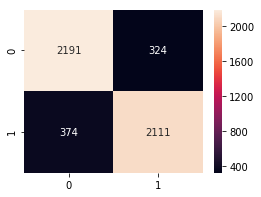

Vectorizer: TfidfVectorizer. Classifier: RandomForestClassifier
Accuracy: 0.844. Precision: 0.841. Recall: 0.845. F1 Score: 0.843. Specificity: 0.842
              precision    recall  f1-score   support

         neg       0.85      0.84      0.84      2515
         pos       0.84      0.85      0.84      2485

   micro avg       0.84      0.84      0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



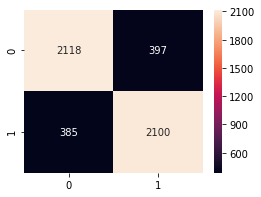

Vectorizer: TfidfVectorizer. Classifier: LGBMClassifier
Accuracy: 0.858. Precision: 0.847. Recall: 0.871. F1 Score: 0.859. Specificity: 0.844
              precision    recall  f1-score   support

         neg       0.87      0.84      0.86      2515
         pos       0.85      0.87      0.86      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



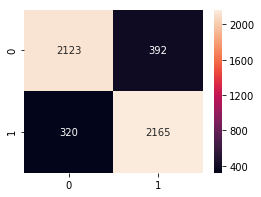

Vectorizer: TfidfVectorizer. Classifier: LinearSVC
Accuracy: 0.890. Precision: 0.880. Recall: 0.903. F1 Score: 0.891. Specificity: 0.878
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



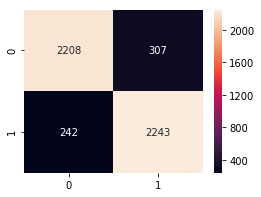

In [19]:
progress = tqdm(total=len(make_vectorizers()) * len(make_classifiers()), ncols=1000)

for vect in make_vectorizers():
    vectorizer = vect[1]
    vectorizer_name = vect[0]
    
    X = vectorizer.fit_transform(train.text)
    y = train.review
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

    for clas in make_classifiers():
        classifier = clas[1]
        classifier_name = clas[0]
        progress.set_description("{} - {}".format(vectorizer_name, classifier_name))
        classify_and_plot(classifier, classifier_name, vectorizer_name, X_train, X_val, y_train, y_val)
        progress.update(1)

In [20]:
'''metrics_df \
    .sort_values(['accuracy', 'precision', 'recall'], ascending=False).style \
    .format('{:.3f}') \
    .set_properties(**{'min-width': '6em'}) \
    .background_gradient(cmap="coolwarm")'''

# Having to write this custom background colouring routine because Pandas and Matplotlib can't 
#  apply background colours to multiindex DataFrames for some reason (see code above)

from matplotlib import colors
def my_background_gradient(s, cmap='coolwarm'):
    def relative_luminance(rgba):
        r, g, b = (x / 12.92 if x <= 0.03928 else ((x + 0.055) / 1.055 ** 2.4) for x in rgba[:3])
        return 0.2126 * r + 0.7152 * g + 0.0722 * b
    
    def font_color(bg_color):
        rgba = list(colors.hex2color(bg_color))
        return '#f1f1f1' if relative_luminance(rgba) < 0.408 else '#000000'
    
    m = s.min().min()
    M = s.max().max()
    norm = colors.Normalize(m, M)
    normed = s.apply(norm)
    cm = plt.cm.get_cmap(cmap)
    c = normed.apply(lambda x: colors.rgb2hex(cm(x)))
    ret = c.apply(lambda x: 'background-color:%s;color:%s' % (x, font_color(x)))
    return ret

metrics_df \
    .sort_values(['accuracy', 'precision', 'recall'], ascending=False).style \
        .format('{:.3f}') \
        .set_properties(**{'min-width': '6em'}) \
        .apply(my_background_gradient, cmap="coolwarm", axis=0)